### 1 What is Boosting in Machine Learning?  

Boosting is an ensemble technique that combines multiple weak learners (typically decision trees) sequentially. Each model corrects the errors of its predecessor, improving overall accuracy. It reduces bias and variance, making it powerful for both classification and regression.




### 2 Difference between AdaBoost and Gradient Boosting  


**AdaBoost**, short for Adaptive Boosting, works by adjusting the weights of training samples. Initially, all samples are given equal weight. After each iteration, it increases the weight of misclassified samples so that the next weak learner focuses more on those difficult cases. The final prediction is a weighted vote of all weak learners. It’s simple and effective, especially for clean datasets, but can be sensitive to noisy data and outliers.

**Gradient Boosting**, on the other hand, builds models sequentially by fitting each new model to the residual errors of the previous one. Instead of reweighting samples, it uses gradient descent to minimize a loss function. This makes it more flexible and powerful, especially when dealing with complex patterns or noisy data. It also allows for regularization techniques to reduce overfitting.

**In short:** AdaBoost focuses on misclassified samples by reweighting them, while Gradient Boosting focuses on minimizing prediction errors using gradients. Gradient Boosting tends to be more robust and customizable, which is why variants like XGBoost and LightGBM are widely used in practice.








### 3 How does Regularization help in XGBoost?  



Regularization (via `reg_alpha` and `reg_lambda`) penalizes model complexity, reducing overfitting. It ensures trees don’t grow too deep or overly fit noise, improving generalization.




### 4 Why is CatBoost efficient for categorical data?  



CatBoost handles categorical features natively using ordered boosting and target statistics, avoiding one-hot encoding. It prevents overfitting and is robust to data leakage.



### 5 Real-world applications where Boosting is preferred  



- **Credit scoring**  
- **Fraud detection**  
- **Medical diagnosis**  
- **Customer churn prediction**  
Boosting excels in handling complex patterns and imbalanced data.




### 6 AdaBoost on Breast Cancer Dataset  



In [7]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))




Accuracy: 0.9790209790209791


### 7 Gradient Boosting on California Housing



In [8]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print("R² Score:", r2_score(y_test, model.predict(X_test)))




R² Score: 0.7811978514001833


### 8  XGBoost with GridSearchCV  


In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV

X, y = load_breast_cancer(return_X_y=True)
params = {"learning_rate": [0.01, 0.1, 0.2]}
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
grid = GridSearchCV(model, params, cv=3)
grid.fit(X, y)
print("Best Params:", grid.best_params_)
print("Accuracy:", grid.best_score_)


Best Params: {'learning_rate': 0.1}
Accuracy: 0.9648565859092174


### 9   CatBoost Classifier + Confusion Matrix  


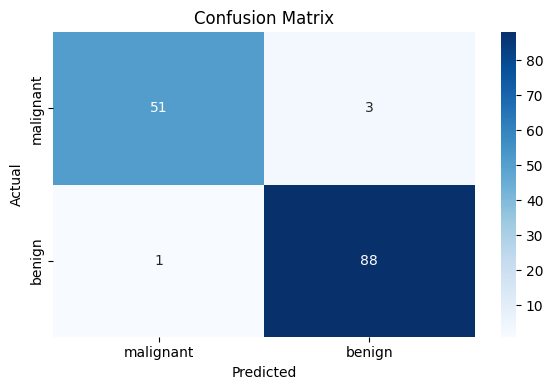

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize and train CatBoost
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

### 10 You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model



**Step-by-step Approach**:
- **Preprocessing**:  
  - Impute missing values (mean for numeric, mode for categorical)  
  - Encode categorical features (CatBoost handles this natively)  
- **Model Choice**:  
  - Use **CatBoost** for mixed data types and missing values  
- **Hyperparameter Tuning**:  
  - Use `GridSearchCV` or `RandomizedSearchCV` on depth, learning rate, iterations  
- **Evaluation Metrics**:  
  - Use **ROC-AUC**, **F1-score**, and **Precision-Recall** for imbalanced data  
- **Business Impact**:  
  - Accurate default prediction reduces financial risk, improves lending decisions, and enhances customer trust



In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve, auc, classification_report
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("Default_Fin.csv")  # Replace with actual path if needed

# Separate features and target
X = df.drop(columns=['Defaulted?'])
y = df['Defaulted?']

# Encode categorical features
for col in X.select_dtypes(include=['object', 'bool']).columns:
    X[col] = X[col].astype(str).fillna("missing")
    X[col] = LabelEncoder().fit_transform(X[col])

# Fill missing numeric values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Model and tuning
model = LGBMClassifier()
params = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 300],
    'min_child_samples': [20, 50]
}
grid = RandomizedSearchCV(model, params, scoring='roc_auc', cv=3, n_iter=5, random_state=42)
grid.fit(X_train, y_train)

# Evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
